In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from scipy.stats import linregress
import matplotlib.cm as cm
import matplotlib.colors as mcol
pd.set_option('display.max_rows', 1000)

api_key = "b89e9b48"

In [2]:
#Reading in csv and previewing data
movie_data_df = pd.read_csv("imdb (1000 movies) in june 2022.csv")
movie_data_df.head()

,ranking of movie\r\n,movie name\r\n,Year,certificate,runtime,genre,RATING,metascore,DETAIL ABOUT MOVIE\n,DIRECTOR\r\n,ACTOR 1\n,ACTOR 2\n,ACTOR 3,ACTOR 4,votes,GROSS COLLECTION\r\n
0,1,The Shawshank Redemption,-1994,15,142 min,Drama,9.3,81.0,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"2,603,314",$28.34M
1,2,The Godfather,-1972,X,175 min,"Crime, Drama",9.2,100.0,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"1,798,731",$134.97M
2,3,The Dark Knight,-2008,12A,152 min,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"2,574,810",$534.86M
3,4,The Lord of the Rings: The Return of the King,-2003,12A,201 min,"Action, Adventure, Drama",9.0,94.0,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,"1,787,701",$377.85M
4,5,Schindler's List,-1993,15,195 min,"Biography, Drama, History",9.0,94.0,"In German-occupied Poland during World War II,...",Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,"1,323,776",$96.90M


In [3]:
#renaming columns
clean_df = movie_data_df.rename(columns={
    "ranking of movie\r\n":"IMDB Rank",
    "movie name\r\n":"Movie Name",
    "certificate":"Rating",
    "runtime":"Runtime (Minutes)",
    "genre":"Genre",
    "RATING":"IMDB Score",
    "metascore":"Metascore",
    "DETAIL ABOUT MOVIE\n":"Details",
    "DIRECTOR\r\n":"Director",
    "ACTOR 1\n":"Actor 1",
    "ACTOR 2\n": "Actor 2",
    "ACTOR 3":"Actor 3",
    "ACTOR 4":"Actor 4",
    "votes":"IMDB Votes",
    "GROSS COLLECTION\r\n":"BoxOffice (Millions)"
})


#cleaning up columns and setting data types
#dropping null values
clean_df=clean_df.dropna()

# #cleaning year - removing "-" and setting to int

clean_df['Year'] = clean_df['Year'].str.extract(pat='(\d+)', expand=False)
clean_df["Year"]=clean_df["Year"].astype("int")

# #cleaning runtime and setting as int
clean_df["Runtime (Minutes)"]=clean_df["Runtime (Minutes)"].str.split(" ").str[0]
clean_df["Runtime (Minutes)"]=clean_df["Runtime (Minutes)"].astype("int")

# #clean up Genre to only get the first genre
clean_df["Main Genre"]=clean_df["Genre"].str.split(",").str[0]
clean_df["Sub Genre"]=clean_df["Genre"].str.split(",").str[1]
clean_df = clean_df.drop(columns="Genre")


#setting IMDB Score as int
clean_df["IMDB Score"]=clean_df["IMDB Score"].astype("float")

# #cleaning box office. Removing "$" and "M" and setting to float
clean_df["BoxOffice (Millions)"]=clean_df["BoxOffice (Millions)"].str.split("M").str[0]
clean_df["BoxOffice (Millions)"]=clean_df["BoxOffice (Millions)"].str.split("$").str[1]
clean_df["BoxOffice (Millions)"]=clean_df["BoxOffice (Millions)"].astype("float")

#Cleaning up IMDB votes and setting as int
clean_df["IMDB Votes"]=clean_df["IMDB Votes"].str.replace(",","")
clean_df["IMDB Votes"]=clean_df["IMDB Votes"].astype("int")


#standardize movie ratings
clean_df["Rating"]=clean_df["Rating"].replace("A","G")
clean_df["Rating"]=clean_df["Rating"].replace("U","G")
clean_df["Rating"]=clean_df["Rating"].replace("AA","PG")
clean_df["Rating"]=clean_df["Rating"].replace("12","PG")
clean_df["Rating"]=clean_df["Rating"].replace("15","PG-13")
clean_df["Rating"]=clean_df["Rating"].replace("12A","PG-13")
clean_df["Rating"]=clean_df["Rating"].replace("UA","PG-13")
clean_df["Rating"]=clean_df["Rating"].replace("18","R")
clean_df["Rating"]=clean_df["Rating"].replace("X","NC17")




#resetting index and displaying
clean_df=clean_df.reset_index()
clean_df=clean_df.drop(columns="index")
clean_df.head()







,IMDB Rank,Movie Name,Year,Rating,Runtime (Minutes),IMDB Score,Metascore,Details,Director,Actor 1,Actor 2,Actor 3,Actor 4,IMDB Votes,BoxOffice (Millions),Main Genre,Sub Genre
0,1,The Shawshank Redemption,1994,PG-13,142,9.3,81.0,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2603314,28.34,Drama,NaN
1,2,The Godfather,1972,NC17,175,9.2,100.0,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1798731,134.97,Crime,Drama
2,3,The Dark Knight,2008,PG-13,152,9.0,84.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2574810,534.86,Action,Crime
3,4,The Lord of the Rings: The Return of the King,2003,PG-13,201,9.0,94.0,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1787701,377.85,Action,Adventure
4,5,Schindler's List,1993,PG-13,195,9.0,94.0,"In German-occupied Poland during World War II,...",Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1323776,96.90,Biography,Drama


In [4]:
#creating a new column to store award info
clean_df["Awards"]=""
clean_df

,IMDB Rank,Movie Name,Year,Rating,Runtime (Minutes),IMDB Score,Metascore,Details,Director,Actor 1,Actor 2,Actor 3,Actor 4,IMDB Votes,BoxOffice (Millions),Main Genre,Sub Genre,Awards
0,1,The Shawshank Redemption,1994,PG-13,142,9.3,81.0,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2603314,28.34,Drama,NaN,
1,2,The Godfather,1972,NC17,175,9.2,100.0,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1798731,134.97,Crime,Drama,
2,3,The Dark Knight,2008,PG-13,152,9.0,84.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2574810,534.86,Action,Crime,
3,4,The Lord of the Rings: The Return of the King,2003,PG-13,201,9.0,94.0,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1787701,377.85,Action,Adventure,
4,5,Schindler's List,1993,PG-13,195,9.0,94.0,"In German-occupied Poland during World War II,...",Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1323776,96.90,Biography,Drama,
5,6,The Godfather Part II,1974,NC17,202,9.0,90.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1239027,57.30,Crime,Drama,
6,7,12 Angry Men,1957,G,96,9.0,96.0,The jury in a New York City murder trial is fr...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,769113,4.36,Crime,Drama,
7,9,Pulp Fiction,1994,R,154,8.9,94.0,"The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1995346,107.93,Crime,Drama,
8,10,Inception,2010,PG-13,148,8.8,74.0,A thief who steals corporate secrets through t...,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2284252,292.58,Action,Adventure,
9,11,The Lord of the Rings: The Two Towers,2002,PG-13,179,8.8,87.0,While Frodo and Sam edge closer to Mordor with...,Peter Jackson,Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom,1614489,342.55,Action,Adventure,


In [5]:
#search OMDB API for award info and put result in our new column

# for index, row in clean_df.iterrows():
#     try:
#         params = {
#         "apikey": api_key,
#         "t": row["Movie Name"]}
    
#         url = "http://www.omdbapi.com"
#         res = requests.get(url,params=params).json()
#         clean_df.loc[index,"Awards"]=res["Awards"]
#     except: 
#         pass
    

In [6]:
clean_df["Awards"]


0      
1      
2      
3      
4      
5      
6      
7      
8      
9      
10     
11     
12     
13     
14     
15     
16     
17     
18     
19     
20     
21     
22     
23     
24     
25     
26     
27     
28     
29     
30     
31     
32     
33     
34     
35     
36     
37     
38     
39     
40     
41     
42     
43     
44     
45     
46     
47     
48     
49     
50     
51     
52     
53     
54     
55     
56     
57     
58     
59     
60     
61     
62     
63     
64     
65     
66     
67     
68     
69     
70     
71     
72     
73     
74     
75     
76     
77     
78     
79     
80     
81     
82     
83     
84     
85     
86     
87     
88     
89     
90     
91     
92     
93     
94     
95     
96     
97     
98     
99     
100    
101    
102    
103    
104    
105    
106    
107    
108    
109    
110    
111    
112    
113    
114    
115    
116    
117    
118    
119    
120    
121    
122    
123    
124    


In [7]:
#put clean dataframe into csv
clean_df.to_csv("Refined_Data.csv",index=False)

In [8]:
#read clean csv to perform data analysis
refined_df=pd.read_csv("Refined_Data.csv")


In [9]:
clean_df["Rating"]=clean_df["Rating"].replace("U","G")
clean_df["Rating"]=clean_df["Rating"].replace("AA","PG")
clean_df["Rating"]=clean_df["Rating"].replace("12","PG")
clean_df["Rating"]=clean_df["Rating"].replace("15","PG-13")
clean_df["Rating"]=clean_df["Rating"].replace("12A","PG-13")
clean_df["Rating"]=clean_df["Rating"].replace("UA","PG-13")
clean_df["Rating"]=clean_df["Rating"].replace("18","R")
clean_df["Rating"]=clean_df["Rating"].replace("X","NC17")
clean_df

,IMDB Rank,Movie Name,Year,Rating,Runtime (Minutes),IMDB Score,Metascore,Details,Director,Actor 1,Actor 2,Actor 3,Actor 4,IMDB Votes,BoxOffice (Millions),Main Genre,Sub Genre,Awards
0,1,The Shawshank Redemption,1994,PG-13,142,9.3,81.0,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2603314,28.34,Drama,NaN,
1,2,The Godfather,1972,NC17,175,9.2,100.0,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1798731,134.97,Crime,Drama,
2,3,The Dark Knight,2008,PG-13,152,9.0,84.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2574810,534.86,Action,Crime,
3,4,The Lord of the Rings: The Return of the King,2003,PG-13,201,9.0,94.0,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1787701,377.85,Action,Adventure,
4,5,Schindler's List,1993,PG-13,195,9.0,94.0,"In German-occupied Poland during World War II,...",Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1323776,96.90,Biography,Drama,
5,6,The Godfather Part II,1974,NC17,202,9.0,90.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1239027,57.30,Crime,Drama,
6,7,12 Angry Men,1957,G,96,9.0,96.0,The jury in a New York City murder trial is fr...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,769113,4.36,Crime,Drama,
7,9,Pulp Fiction,1994,R,154,8.9,94.0,"The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1995346,107.93,Crime,Drama,
8,10,Inception,2010,PG-13,148,8.8,74.0,A thief who steals corporate secrets through t...,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2284252,292.58,Action,Adventure,
9,11,The Lord of the Rings: The Two Towers,2002,PG-13,179,8.8,87.0,While Frodo and Sam edge closer to Mordor with...,Peter Jackson,Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom,1614489,342.55,Action,Adventure,


# Dalila  Genre vs Gross ,Does the genre of the movie dictate the gross at boxoffice?

In [10]:
clean_df ["Main Genre"]
clean_df["BoxOffice (Millions)"]

0       28.34
1      134.97
2      534.86
3      377.85
4       96.90
5       57.30
6        4.36
7      107.93
8      292.58
9      342.55
10      37.03
11     315.54
12     330.25
13       6.10
14     171.48
15      46.84
16     290.48
17     112.00
18     188.02
19       7.56
20      10.06
21     216.54
22     136.80
23      57.60
24     100.13
25     204.84
26     130.74
27     322.74
28       0.27
29      53.37
30      13.09
31      13.18
32      53.09
33     132.38
34      32.57
35     187.71
36       6.72
37      23.34
38      19.50
39     422.78
40      11.99
41     210.61
42      83.47
43      78.90
44       5.32
45      32.00
46      36.76
47       1.02
48       0.16
49       0.02
50       1.66
51     335.45
52       5.02
53     190.24
54     858.37
55     678.82
56     209.73
57     162.81
58     448.14
59       6.53
60     223.81
61      11.29
62       0.71
63      25.54
64     130.10
65       2.38
66      75.60
67      85.16
68      51.97
69     248.16
70      11.49
71    

In [19]:
clean_df ["Main Genre"].value_counts()


Drama        206
Action       133
Comedy       107
Crime         83
Biography     70
Animation     66
Adventure     49
Horror        11
Mystery        5
Western        4
Film-Noir      1
Family         1
Thriller       1
Fantasy        1
Name: Main Genre, dtype: int64

In [12]:
bygenre_df = clean_df.groupby("Main Genre").mean()

/var/folders/kt/1fx10t2106b_4w73r9y1pc6c0000gn/T/ipykernel_8311/2668179842.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bygenre_df = clean_df.groupby("Main Genre").mean()


In [55]:
bygenre_df 

,Main Genre,Year,Runtime (Minutes),IMDB Score,Metascore,IMDB Votes,BoxOffice (Millions)
13,Western,1967.000000,143.250000,8.125000,79.000000,178020.500000,16.165000
12,Thriller,1967.000000,108.000000,7.700000,81.000000,30454.000000,17.550000
11,Mystery,1983.400000,124.000000,8.280000,83.400000,793934.800000,50.130000
10,Horror,1981.909091,107.181818,7.936364,78.545455,382450.363636,67.360000
9,Film-Noir,1949.000000,104.000000,8.100000,97.000000,170010.000000,0.450000
8,Fantasy,1998.000000,100.000000,7.600000,66.000000,198706.000000,14.380000
7,Family,1971.000000,100.000000,7.800000,67.000000,198006.000000,4.000000
6,Drama,1992.703883,127.645631,7.948544,79.543689,279052.771845,39.436019
5,Crime,1992.301205,128.397590,8.007229,77.771084,435541.096386,39.472289
4,Comedy,1990.532710,111.271028,7.873832,78.018692,256276.953271,39.586355


In [13]:
bygenre_df = bygenre_df.reset_index()

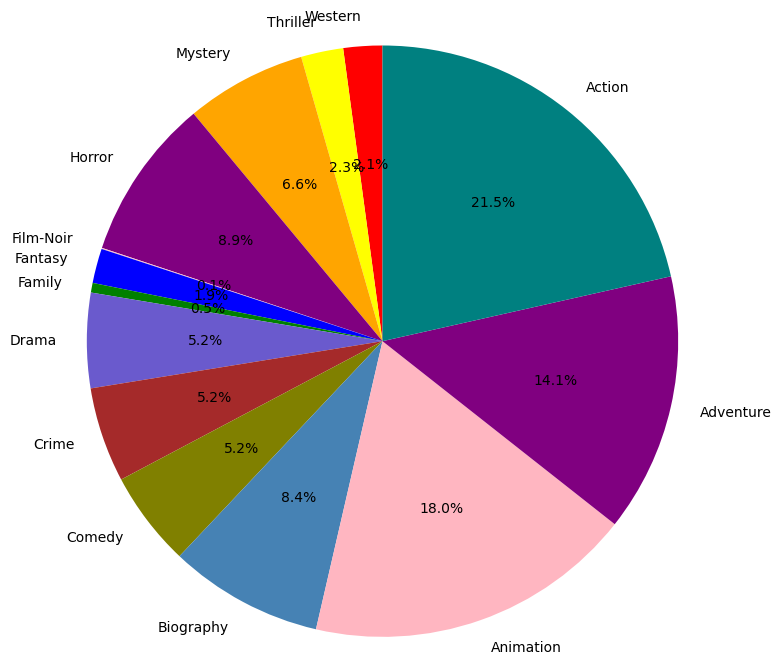

In [53]:

import matplotlib.pyplot as plt

labels= bygenre_df['Main Genre']

sizes = bygenre_df['BoxOffice (Millions)']
colors = ['red', 'yellow', 'orange', 'purple', 'pink','blue','green','Slateblue','brown','olive','steelblue','lightpink','purple','teal']


# Create pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90,radius=2)

# Show plot
plt.show()


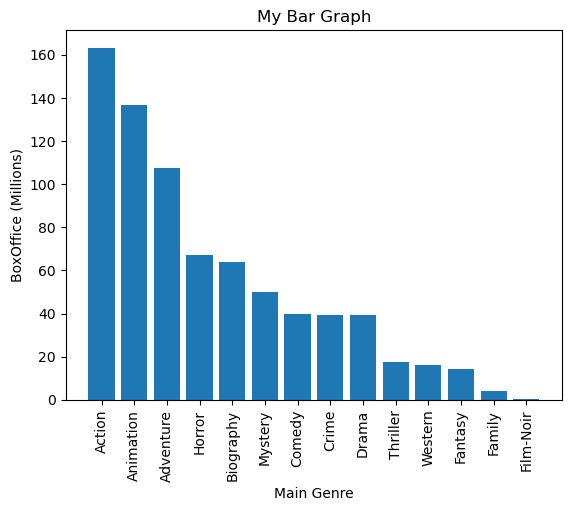

In [57]:
import numpy as np
import matplotlib.pyplot as plt

 
x = ['Action','Animation','Adventure','Horror','Biography','Mystery','Comedy','Crime','Drama','Thriller','Western','Fantasy','Family','Film-Noir']
y = [163.267068,136.756364,107.517959,67.360000,64.086429,50.130000,39.586355,39.472289,39.436019,17.550000,16.165000,14.380000,4.000000,0.450000]

# Create bar graph
plt.bar(x, y)


# Add labels and title
plt.xlabel('Main Genre')
plt.ylabel('BoxOffice (Millions)')
plt.title('My Bar Graph')



plt.xticks(rotation = 'vertical') 
# Show graph
plt.show()
